In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('spam.csv')
df = pd.DataFrame(train_data)
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [18]:
X = df['text']
y = df['label']

### Check number of ham and spam

<Axes: >

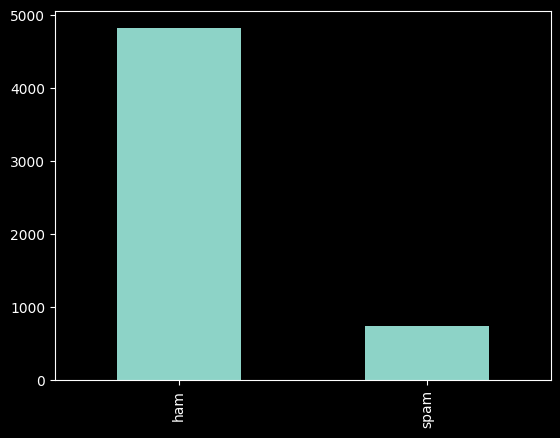

In [19]:
y = df['label']
y.value_counts().plot.bar()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Check outlier

In [21]:
df.isnull().sum()

label    0
text     0
dtype: int64

### Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### NB (Multinomial)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

steps = [('tfidf',TfidfVectorizer()),
         ('mnb', MultinomialNB(alpha=1e-04))]
         
mnb_pipeline = Pipeline(steps)
mnb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('mnb', MultinomialNB(alpha=0.0001))])

In [43]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

ypred_test = mnb_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test) 
report_clf = classification_report(y_test, ypred_test) 

print(mat_clf)
print(report_clf)

# auc = roc_auc_score(y_test, ypred_test)
# print(auc)

[[1578    9]
 [  25  227]]
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1587
        spam       0.96      0.90      0.93       252

    accuracy                           0.98      1839
   macro avg       0.97      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839

